| [$\leftarrow$ 3. Polynomial Regression ](n3_polynomial_regression.ipynb) | [5. Comparison and Conclusion $\rightarrow$](n5_comparison_conclusion.ipynb) |
| :-----------------------------------------------------------------: | :---------------------------------------------------------------: |

<hr>

### 4. **Linear and Polynomial Regression**

#### 4.1. **Getting Started**

On this notebook, the best polynomial model is combined with the best linear model. Again, we will compare the results between having the encoded species and having no species at all.

In [1]:
# Append the path to useful directories
import sys
sys.path.append('../my_functions')

# Packages needed
from download_dataset import download_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Download and extract the dataset
fishcatch = download_dataset(data_file='fishcatch', extension='.tar.xz')

# Quick peek at the data
df = pd.read_csv(fishcatch)
df.head(3).style.background_gradient(cmap='viridis')

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.000000,23.200000,25.400000,30.000000,11.520000,4.020000
1,Bream,290.000000,24.000000,26.300000,31.200000,12.480000,4.305600
2,Bream,340.000000,23.900000,26.500000,31.100000,12.377800,4.696100


We transform weight using n = 5, since it was the best polynomial model from the previous notebook.

In [2]:
# Transforming weight
X_weight = df['Weight']

# Drop weight
df.drop('Weight', axis=1, inplace=True)

# PolynomialFeatures (preprocessing)
from sklearn.preprocessing import PolynomialFeatures

# Transforming the feature to the desired degree
poly = PolynomialFeatures(degree=5)
X_weight = poly.fit_transform(X_weight.values.reshape(-1, 1))

# Quick peek at the transformed feature
X_weight = pd.DataFrame(X_weight, columns=[f'Weight^{i}' for i in range(X_weight.shape[1])])
X_weight.head(3).style.background_gradient(cmap='viridis')

,Weight^0,Weight^1,Weight^2,Weight^3,Weight^4,Weight^5
0,1.000000,242.000000,58564.000000,14172488.000000,3429742096.000000,829997587232.000000
1,1.000000,290.000000,84100.000000,24389000.000000,7072810000.000000,2051114900000.000000
2,1.000000,340.000000,115600.000000,39304000.000000,13363360000.000000,4543542400000.000000


#### 4.2. **Droping the 'Species' variable**

In [3]:
# Including only the numeric columns
df_no_species = df.select_dtypes(include=['int64', 'float64'])
df_no_species.head(3).style.background_gradient(cmap='viridis')

,Length1,Length2,Length3,Height,Width
0,23.200000,25.400000,30.000000,11.520000,4.020000
1,24.000000,26.300000,31.200000,12.480000,4.305600
2,23.900000,26.500000,31.100000,12.377800,4.696100


In [4]:
# Combining the transformed weight with the other features
df_no_species = pd.concat([df_no_species, X_weight], axis=1)
df_no_species.head(3).style.background_gradient(cmap='viridis')

,Length1,Length2,Length3,Height,Width,Weight^0,Weight^1,Weight^2,Weight^3,Weight^4,Weight^5
0,23.200000,25.400000,30.000000,11.520000,4.020000,1.000000,242.000000,58564.000000,14172488.000000,3429742096.000000,829997587232.000000
1,24.000000,26.300000,31.200000,12.480000,4.305600,1.000000,290.000000,84100.000000,24389000.000000,7072810000.000000,2051114900000.000000
2,23.900000,26.500000,31.100000,12.377800,4.696100,1.000000,340.000000,115600.000000,39304000.000000,13363360000.000000,4543542400000.000000


In [5]:
# Splitting the dataset into features and target variable
X = df_no_species.drop(columns=['Width'])
y = df_no_species['Width']

In [6]:
# Split the dataset into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [7]:
# Fitting the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
# R2 score of the training set
train_r2 = lr.score(X_train, y_train)
print(f'Training R²: {train_r2:.3f}')

Training R²: 0.946


In [9]:
# Where the model intercepts the y-axis
intercept = lr.intercept_
print(f'Intercept: {intercept}')

# The coefficients of the model
coef = lr.coef_
print(f'Coefficients: {coef}')

Intercept: 1.7204338360932176
Coefficients: [ 1.27858372e-01  1.15389718e-01 -2.51717257e-01  7.77124304e-02
  1.11050322e-13  2.34489689e-02 -6.56899317e-05  1.03378464e-07
 -7.43893111e-11  1.91374694e-14]


In [10]:
# Equation of the line
print(f"{y.name} = \n{intercept:.6f} ")
for i, j in zip(X.columns, coef):
    print(f"+ {i}*{j:.6f}")

Width = 
1.720434 
+ Length1*0.127858
+ Length2*0.115390
+ Length3*-0.251717
+ Height*0.077712
+ Weight^0*0.000000
+ Weight^1*0.023449
+ Weight^2*-0.000066
+ Weight^3*0.000000
+ Weight^4*-0.000000
+ Weight^5*0.000000


In [11]:
# Testing the model
y_pred = lr.predict(X_test)
y_pred

array([3.0226921 , 1.74053477, 3.73254046, 4.37434882, 3.64991052,
       6.90880814, 1.61029163, 3.79440678, 4.06204145, 6.00398025,
       5.75262534, 7.00115839, 5.60581262, 3.78545462, 5.94588171,
       6.73277788, 7.16594665, 4.38614392, 4.39903243, 5.96984176,
       1.62940692, 5.6775179 , 5.15566483, 5.07330428, 6.81742112,
       7.142034  , 3.9121319 , 4.32668009, 1.61110614, 1.6271897 ,
       5.03006804, 2.78861878])

In [12]:
# Performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.20957490968683545
Root Mean Squared Error: 0.4577935229848009
Mean Absolute Error: 0.37594793487107553
R2 Score: 0.9402730149853048


In [13]:
# Save the results to a csv file
from save_results import save_results
save_results(mse, mae, r2, rmse, train_r2, 'Linear and Polynomial: with no species')

Results saved successfully to "results.csv".


#### 4.3. **Using the 'Species' variable**

In [14]:
from sklearn.preprocessing import OneHotEncoder

# Encoding the Species column
encoder = OneHotEncoder()
encoder.handle_unknown = 'ignore'

# Turning the Species column into a numpy array with new columns
# for each species. 1: True, 0: False
species_encoded = encoder.fit_transform(df[['Species']])
species_encoded.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [15]:
# Combine the encoded species with the original dataset
encoder.get_feature_names_out()

df_output = pd.DataFrame(encoder.transform(df[['Species']]).toarray(),

                         columns=encoder.categories_[0].tolist(),

                         index=df.index)


df_with_species = pd.concat(
    [df_output, df.drop(columns=['Species'])], axis=1)

df_with_species.head(3).style.background_gradient(cmap='viridis')

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish,Length1,Length2,Length3,Height,Width
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,25.400000,30.000000,11.520000,4.020000
1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,26.300000,31.200000,12.480000,4.305600
2,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.900000,26.500000,31.100000,12.377800,4.696100


In [16]:
# Combining the transformed weight with the other features
df_with_species = pd.concat([df_with_species, X_weight], axis=1)
df_with_species.head(3).style.background_gradient(cmap='viridis')

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish,Length1,Length2,Length3,Height,Width,Weight^0,Weight^1,Weight^2,Weight^3,Weight^4,Weight^5
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,25.400000,30.000000,11.520000,4.020000,1.000000,242.000000,58564.000000,14172488.000000,3429742096.000000,829997587232.000000
1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,26.300000,31.200000,12.480000,4.305600,1.000000,290.000000,84100.000000,24389000.000000,7072810000.000000,2051114900000.000000
2,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.900000,26.500000,31.100000,12.377800,4.696100,1.000000,340.000000,115600.000000,39304000.000000,13363360000.000000,4543542400000.000000


In [17]:
# Splitting the dataset into features and target variable
X = df_with_species.drop(columns=['Width'])
y = df_with_species['Width']

In [18]:
# Split the dataset into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [19]:
# Fitting the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
# R2 score of the training set
train_r2 = lr.score(X_train, y_train)
print(f'Training R²: {train_r2:.3f}')

Training R²: 0.947


In [21]:
# Where the model intercepts the y-axis
intercept = lr.intercept_
print(f'Intercept: {intercept}')

# The coefficients of the model
coef = lr.coef_
print(f'Coefficients: {coef}')

Intercept: 1.6505694104369883
Coefficients: [ 1.33938668e-02 -5.85298503e-02  1.92726964e-01 -2.80674356e-02
 -9.44250311e-02 -2.60055771e-02 -1.43369747e-02  2.29917999e-02
  7.62054967e-02 -1.13402524e-01  2.81950452e-02  6.93889390e-18
  2.34748163e-02 -6.58513267e-05  1.03677671e-07 -7.44003310e-11
  1.90610493e-14]


In [22]:
# Equation of the line
print(f"{y.name} = \n{intercept:.6f} ")
for i, j in zip(X.columns, coef):
    print(f"+ {i}*{j:.6f}")

Width = 
1.650569 
+ Bream*0.013394
+ Parkki*-0.058530
+ Perch*0.192727
+ Pike*-0.028067
+ Roach*-0.094425
+ Smelt*-0.026006
+ Whitefish*-0.014337
+ Length1*0.022992
+ Length2*0.076205
+ Length3*-0.113403
+ Height*0.028195
+ Weight^0*0.000000
+ Weight^1*0.023475
+ Weight^2*-0.000066
+ Weight^3*0.000000
+ Weight^4*-0.000000
+ Weight^5*0.000000


In [23]:
# Testing the model
y_pred = lr.predict(X_test)
y_pred

array([3.07808186, 1.67908128, 3.76166626, 4.35209809, 3.80088662,
       6.91921637, 1.5589547 , 3.67703731, 4.14252466, 6.09129911,
       5.78864194, 6.91923671, 5.60789263, 3.60297699, 5.99642692,
       6.76582588, 7.18323856, 4.36783415, 4.44128537, 6.0201018 ,
       1.58870994, 5.64848803, 5.17350961, 5.134609  , 6.8406244 ,
       7.1407376 , 4.00786038, 4.32702939, 1.56383596, 1.58649046,
       5.03501925, 2.91602822])

In [24]:
# Performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.20048822149211087
Root Mean Squared Error: 0.44775911100960397
Mean Absolute Error: 0.3691798384041504
R2 Score: 0.9428626402913612


In [25]:
# Save the results to a csv file
save_results(mse, mae, r2, rmse, train_r2, 'Linear and Polynomial: encoded species')

Results saved successfully to "results.csv".


Plot saved as results.png


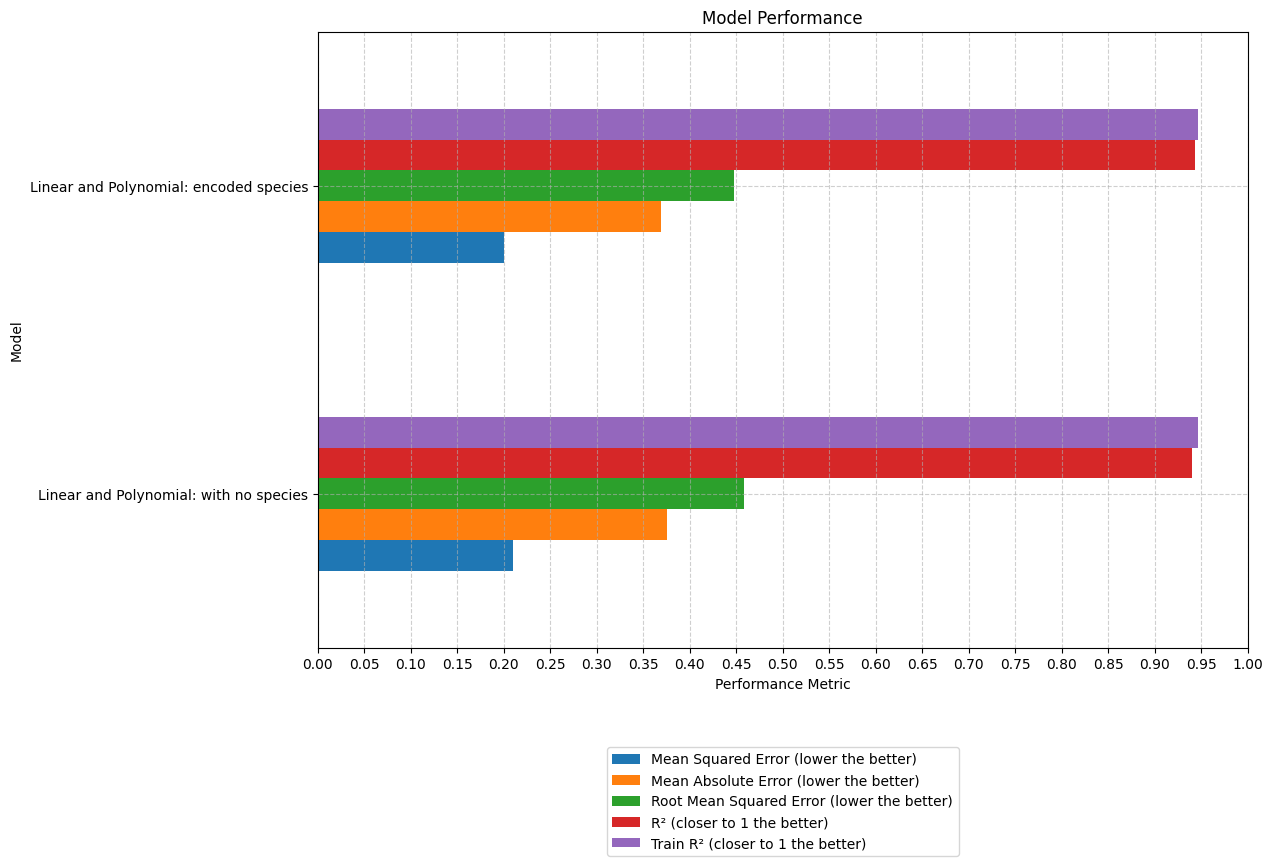

In [26]:
from save_results import plot_results
plot_results(regression_model = 'Linear and Polynomial',
             save_plot = True)

The difference is so small that it is irrelevant.

On the next notebook, we will compare all the results and conclude the project.

### <hr>

| [$\leftarrow$ 3. Polynomial Regression ](n3_polynomial_regression.ipynb) | [5. Comparison and Conclusion $\rightarrow$](n5_comparison_conclusion.ipynb) |
| :-----------------------------------------------------------------: | :---------------------------------------------------------------: |
